In [1]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
path = "./data/elec_*.csv"
all_files = glob.glob(path)
df_list = []
for file in all_files:
    df_list.append(pd.read_csv(file,encoding='euc-kr'))
elec = pd.concat(df_list, ignore_index=True)
elec

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2008/02/22,6017.12,-81.65,-1.34,6015.91,6046.81,5984.13,58385684,665821700063,156724906525070
1,2008/02/21,6098.77,133.74,2.24,6017.30,6122.89,5989.69,36678281,701018417290,158821123889270
2,2008/02/20,5965.03,-118.74,-1.95,6020.88,6078.35,5949.51,35273476,668466709322,155235613488595
3,2008/02/19,6083.77,83.98,1.40,6060.04,6083.77,5985.35,46374368,607123982955,158147018339630
4,2008/02/18,5999.79,-78.75,-1.30,6050.56,6078.70,5943.83,39360506,598947626515,155727531441865
...,...,...,...,...,...,...,...,...,...,...
1231,2003/03/03,3088.00,142.69,4.84,2972.50,3088.00,2969.44,180835189,371660403305,67985608267925
1232,2003/02/28,2945.31,-38.81,-1.30,3005.21,3022.42,2936.83,171958777,296159507185,64836167184555
1233,2003/02/27,2984.12,-10.78,-0.36,2941.42,3003.65,2917.16,162097144,394163829960,65742874843590
1234,2003/02/26,2994.90,-36.91,-1.22,3044.01,3055.73,2985.00,294895739,446182838685,65963563988390


In [3]:
path = "./data/elec_*.csv"

def make_df(path):
    all_files = glob.glob(path)
    df_list = []
    for file in all_files:
        df_list.append(pd.read_csv(file, encoding='euc-kr'))
    return pd.concat(df_list, ignore_index=True)

In [4]:
def align_by_date(df):
    df.sort_values(by='일자', inplace=True)
    df['일자'] = pd.to_datetime(df['일자'])
    df.set_index('일자', inplace=True)
    # df.reset_index(drop=True, inplace=True)
    return df

In [5]:
electric_path = "./data/elec_*.csv"
bank_path = "./data/bank_*.csv"
construction_path = "./data/const_*.csv"
jejo_path = "./data/jejo_*.csv"
energy_path = "./data/ener_*.csv"
kospi_path = "./data/kospi_*.csv"

kospi = align_by_date( make_df(kospi_path) )
elec = align_by_date( make_df(electric_path) )
bank = align_by_date( make_df(bank_path) )
construc = align_by_date( make_df(construction_path) )
jejo = align_by_date( make_df(jejo_path) )
energy = align_by_date( make_df(energy_path) )

In [ ]:
elec

In [ ]:
bank

In [ ]:
def drawGraph(df,title): # 5개년치 데이터를 그래프로 나타내는 함수
    # 그래프를 그립니다.
    plt.figure(figsize=(15, 7)) # 그래프 크기 조절
    plt.plot(df.index, df['종가'],color="blue") # x축은 인덱스('일자'), y축은 '종가'

    # 그래프 제목과 축 레이블을 추가합니다.
    # plt.title(title, fontsize=16)
    # plt.xlabel('일자')
    # plt.ylabel('종가')
    plt.grid(True) # 그리드 추가

    # 그래프를 화면에 보여줍니다.
    plt.show()

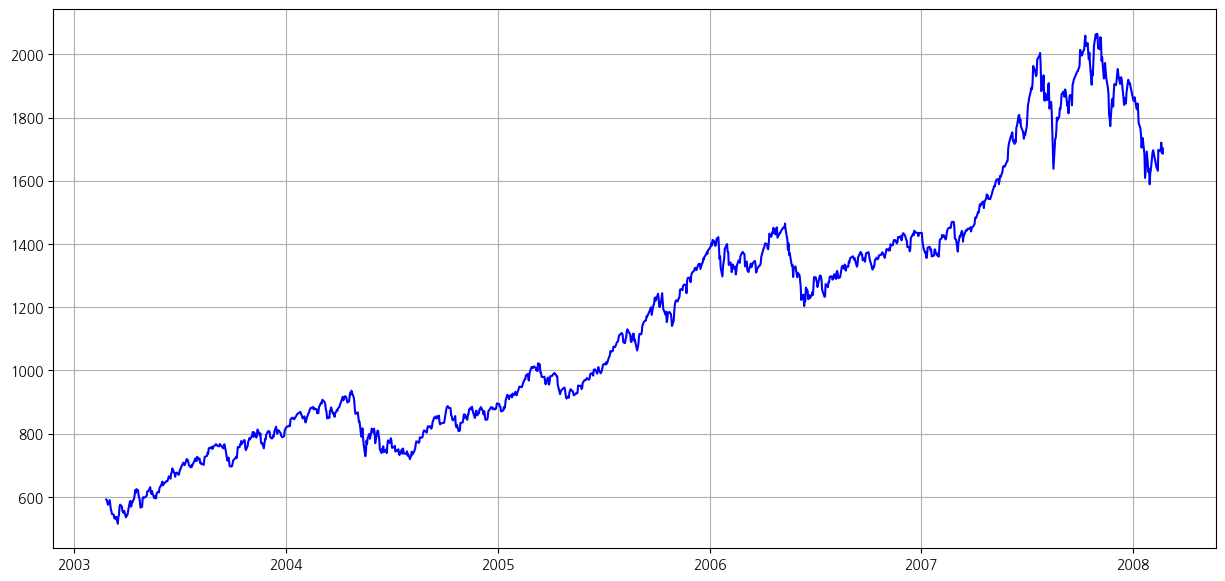

In [26]:
drawGraph(kospi, "노 대통령 임기 내 코스피 종가 변동 추이")

In [10]:
kospi.sort_values(by="등락률").head(20)

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2007-08-16,1691.98,-125.91,-6.93,1754.19,1755.32,1681.71,508224.0,8453547.0,841535086.0
2004-05-10,790.68,-48.06,-5.73,831.10,831.37,771.31,403022.0,3045887.0,352862422.0
2004-05-17,728.98,-39.48,-5.14,766.56,774.39,723.51,371690.0,2849786.0,323496855.0
2003-09-22,714.89,-33.36,-4.46,741.54,741.68,714.75,426498.0,2372481.0,301311034.0
2008-01-22,1609.02,-74.54,-4.43,1628.92,1636.06,1578.37,316867.0,6950698.0,809205167.0
2004-06-03,770.06,-34.33,-4.27,810.98,812.54,770.06,465568.0,2643800.0,341655180.0
2007-08-10,1828.49,-80.19,-4.20,1853.22,1854.62,1814.30,388049.0,7147241.0,909349573.0
2003-03-17,515.24,-22.41,-4.17,535.79,535.79,512.30,640102.0,1755057.0,212386273.0
2007-07-27,1883.22,-80.32,-4.09,1924.01,1924.11,1863.39,517224.0,9264955.0,936695401.0


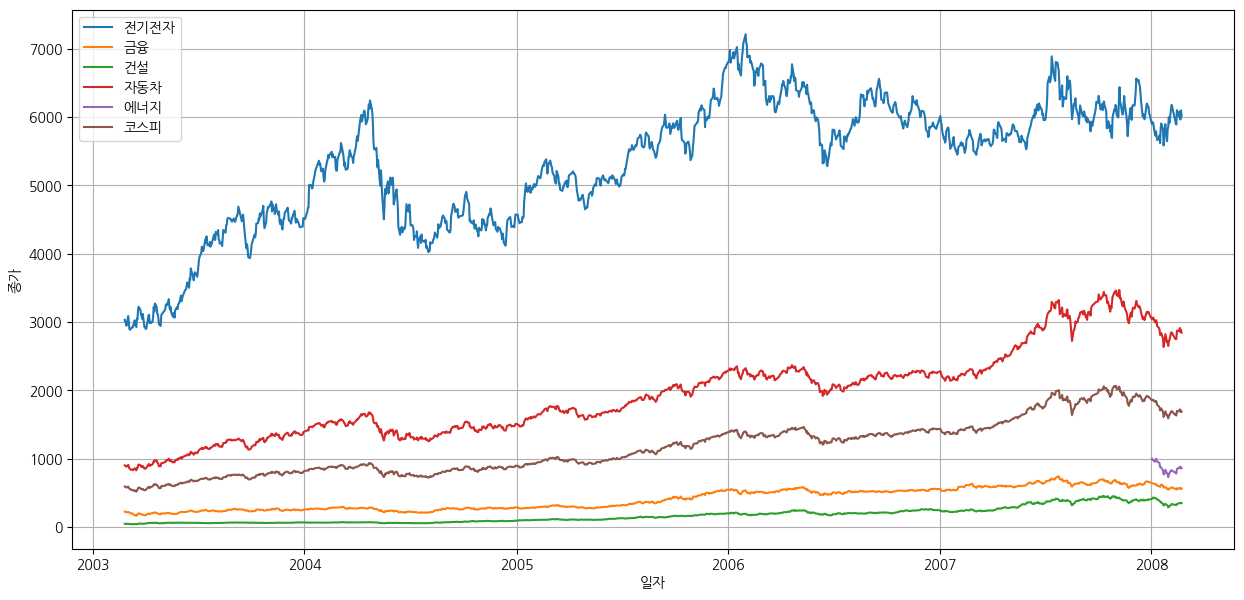

In [7]:
# 5개 한꺼번에 그리기
plt.figure(figsize=(15, 7)) # 그래프 크기 조절
plt.plot(elec.index, elec['종가'], label="전기전자") # x축은 인덱스('일자'), y축은 '종가'
plt.plot(bank.index, bank['종가'], label="금융")
plt.plot(construc.index, construc['종가'], label="건설")
plt.plot(jejo.index, jejo['종가'], label="자동차")
plt.plot(energy.index, energy['종가'], label="에너지")
plt.plot(kospi.index, kospi['종가'], label="코스피")

# 그래프 제목과 축 레이블을 추가합니다.
plt.title('', fontsize=16)
plt.xlabel('일자')
plt.ylabel('종가')
plt.grid(True) # 그리드 추가
plt.legend()

# 그래프를 화면에 보여줍니다.
plt.show()

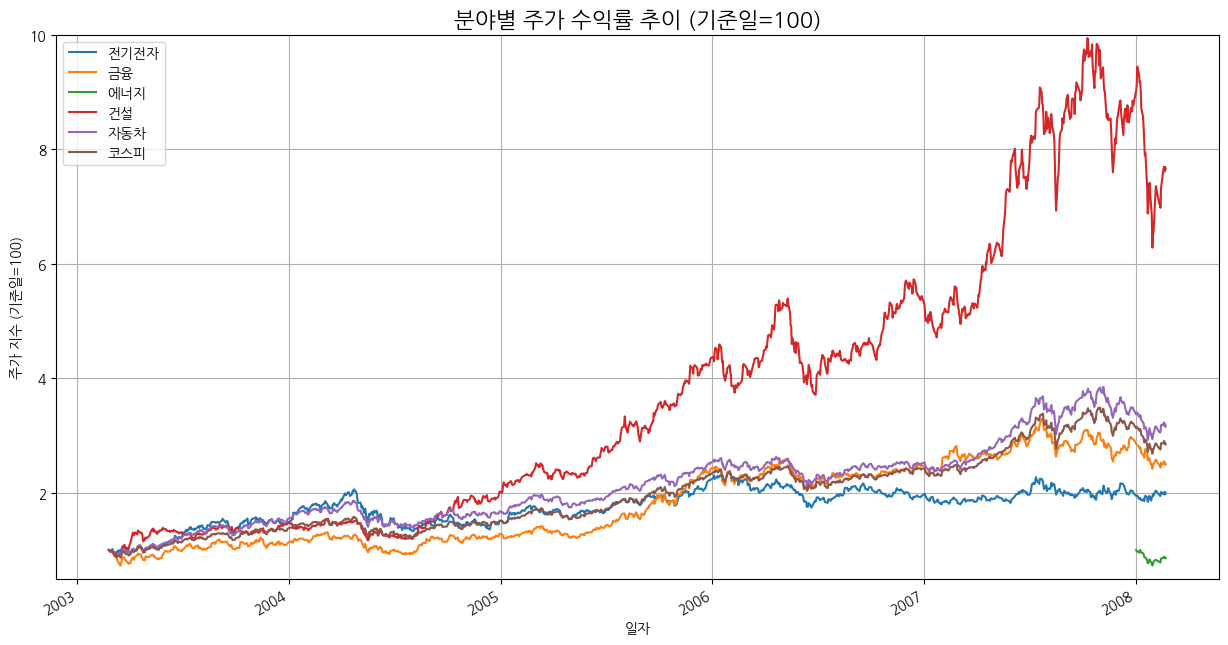

In [8]:
# 1. 실제 데이터프레임과 분야 이름을 리스트에 담습니다.
df_list = [elec, bank, energy, construc, jejo, kospi] # 실제 변수명으로 수정
name_list = ['전기전자', '금융', '에너지', '건설', '자동차', '코스피']

# 2. 정규화된 데이터를 저장할 새로운 데이터프레임을 생성합니다.
# '일자'를 인덱스로 사용합니다. (어떤 df의 '일자'를 써도 무방)
normalized_df = pd.DataFrame(index=elec.index)


# 3. 각 데이터프레임에 대해 정규화를 수행합니다.
for df, name in zip(df_list, name_list):
    # 첫 날의 종가를 기준값으로 설정
    base_price = df['종가'].iloc[0]
    
    # (현재가 / 기준가) * 100 공식으로 정규화하여 새 컬럼으로 추가
    normalized_df[name] = (df['종가'] / base_price)


# --- 정규화된 데이터로 그래프 그리기 ---

# 4. 정규화된 데이터프레임으로 그래프를 그립니다.
ax = normalized_df.plot(figsize=(15, 8))

# 5. 그래프 꾸미기
ax.set_title('분야별 주가 수익률 추이 (기준일=100)', fontsize=16)
ax.set_ylabel('주가 지수 (기준일=100)')
ax.set_xlabel('일자')
ax.set_ylim([0.5, 10]) 
ax.grid(True)

# 기준선(100)을 점선으로 추가하여 시각적 비교를 돕습니다.
ax.axhline(100, color='gray', linestyle='--', linewidth=1)

plt.show()

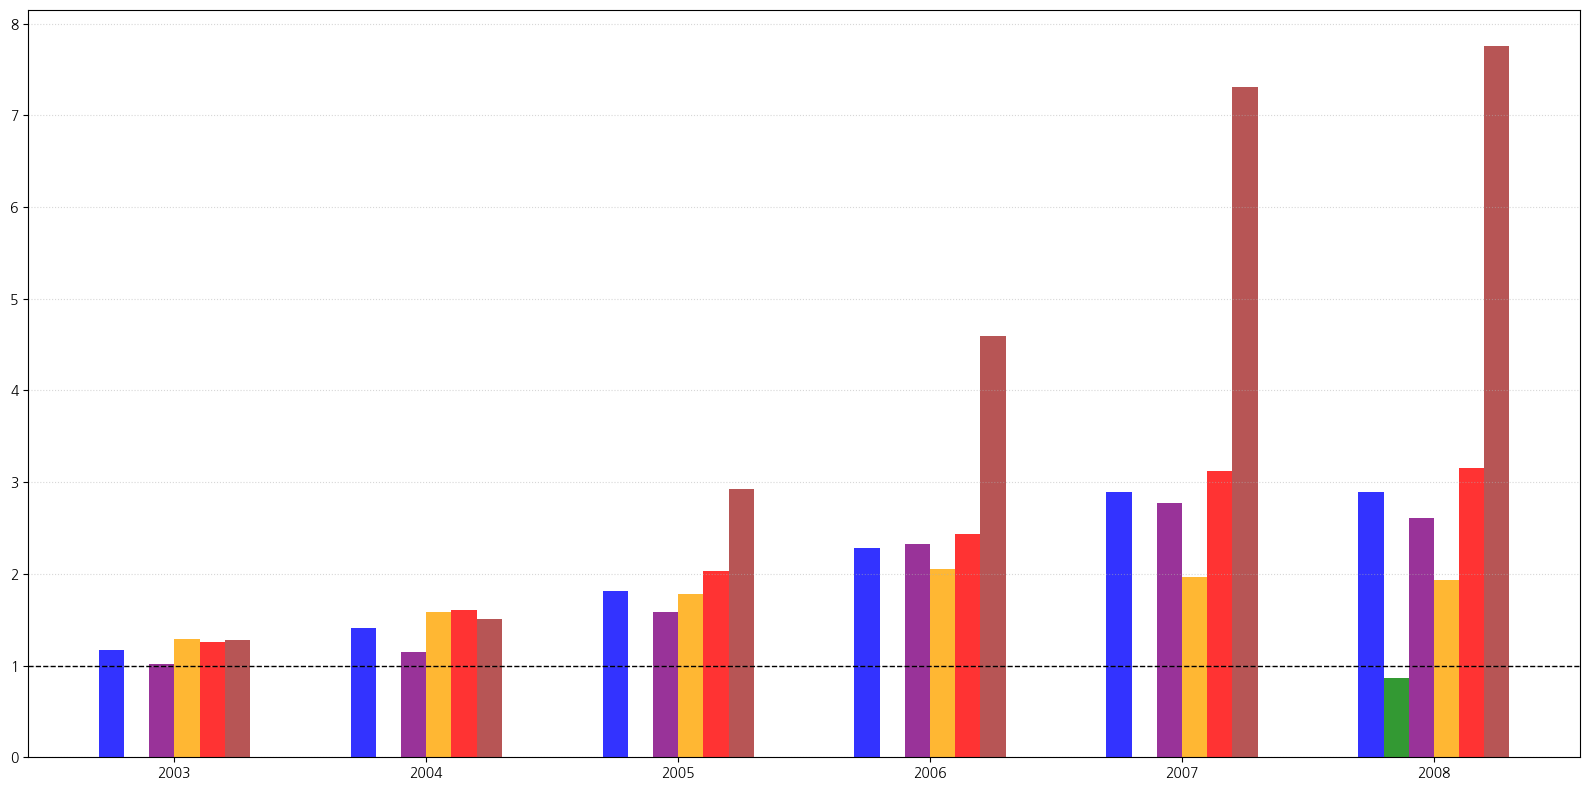

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# 연도별 평균 정규화 종가 저장용 딕셔너리
datasets = {
    'KOSPI': [
        "/home/psh/dev_ws/eda-repo-4/data/kospi_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/kospi_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/kospi_070226_080222.csv"
    ],
    '에너지': [
        "/home/psh/dev_ws/eda-repo-4/data/ener_080102_080222.csv"
    ],
    '금융': [
        "/home/psh/dev_ws/eda-repo-4/data/bank_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/bank_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/bank_070226_080222.csv"
    ],
    '전기전자': [
        "/home/psh/dev_ws/eda-repo-4/data/elec_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/elec_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/elec_070226_080222.csv"
    ],
    '제조': [
        "/home/psh/dev_ws/eda-repo-4/data/jejo_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/jejo_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/jejo_070226_080222.csv"
    ],
    '건설': [
        "/home/psh/dev_ws/eda-repo-4/data/const_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/const_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/const_070226_080222.csv"
    ]
}
colors = ['blue', 'green', 'purple', 'orange', 'red', 'brown']
yearly_avg_values = {}
for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    df['연도'] = df['일자'].dt.year
    yearly_avg = df.groupby('연도')['정규화종가'].mean()
    yearly_avg_values[sector_name] = yearly_avg
# 연도 전체 범위 계산
all_years = sorted(set().union(*(avg.index for avg in yearly_avg_values.values())))
x = np.arange(len(all_years))  # 연도별 x좌표 위치
bar_width = 0.1               # 막대 너비
plt.figure(figsize=(16, 8))
# 각 산업군별로 바(bar) 그리기
for i, (sector, yearly_avg) in enumerate(yearly_avg_values.items()):
    # 연도별 데이터가 없을 수도 있어 all_years 기준으로 NaN 보간
    yearly_data = yearly_avg.reindex(all_years, fill_value=np.nan)
    plt.bar(x + i * bar_width, yearly_data, width=bar_width, label=sector, color=colors[i % len(colors)], alpha=0.8)
# x축 연도 라벨 설정
plt.xticks(x + (bar_width * (len(yearly_avg_values) - 1) / 2), all_years)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
# plt.title('노무현 정부 기간 산업군별 연도별 평균 정규화 종가 비교')
# plt.xlabel('연도')
# plt.ylabel('평균 정규화 종가')
# plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
# plt.grid(axis='x')
plt.tight_layout()

In [9]:
construc.sort_values(by="등락률")

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2007-08-16,329.86,-41.74,-11.23,350.68,352.74,326.55,16197280,496082475310,41935571311630
2008-01-30,286.62,-25.59,-8.20,317.26,317.26,281.02,27783421,431764059140,36874757893250
2003-04-25,52.58,-4.44,-7.79,55.84,55.84,52.01,103263474,259810906100,5362348523060
2008-01-21,334.87,-27.19,-7.51,356.42,357.10,331.23,19205591,657828139970,43059747342120
2004-10-20,81.91,-6.07,-6.90,87.64,88.00,81.91,29263226,211545223275,10414067277115
...,...,...,...,...,...,...,...,...,...
2006-07-20,198.33,10.92,5.83,193.22,198.33,192.65,7436263,134946901970,25245592391540
2006-06-30,184.81,10.59,6.08,179.37,185.76,177.85,10704941,220694189155,23555243044965
2007-08-20,342.61,26.48,8.38,329.94,344.89,328.86,14543462,345825313645,43547316310880


In [11]:
construc['종가'][-1]/construc['종가'][0] * 100

/tmp/ipykernel_4562/3188065799.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  construc['종가'][-1]/construc['종가'][0] * 100


np.float64(765.293602103418)

In [12]:
elec['종가'][-1]/elec['종가'][0] * 100

/tmp/ipykernel_4562/589363141.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec['종가'][-1]/elec['종가'][0] * 100


np.float64(198.4662627275456)

In [13]:
bank['종가'][-1]/bank['종가'][0] * 100

/tmp/ipykernel_4562/1159782441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bank['종가'][-1]/bank['종가'][0] * 100


np.float64(249.4295391746145)

In [14]:
jejo['종가'][-1]/jejo['종가'][0] * 100

/tmp/ipykernel_4562/10352740.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jejo['종가'][-1]/jejo['종가'][0] * 100


np.float64(315.4952076677316)

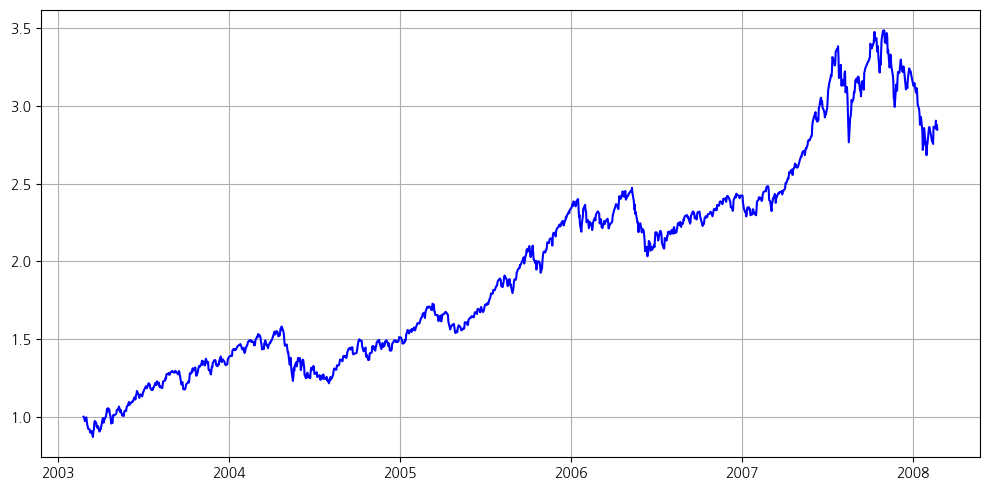

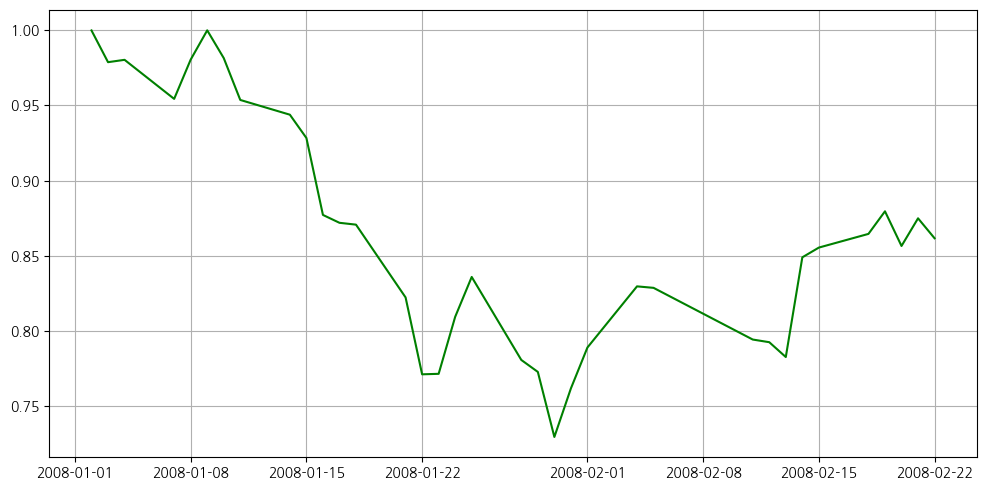

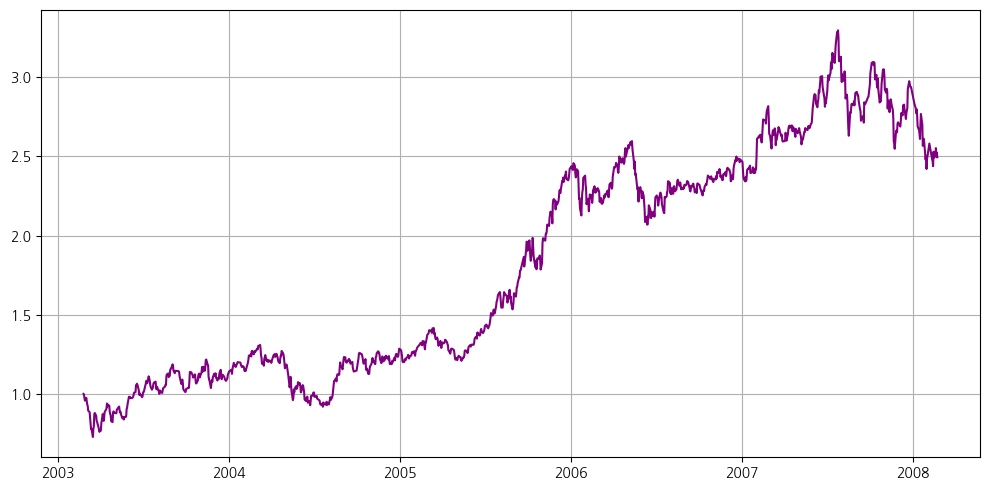

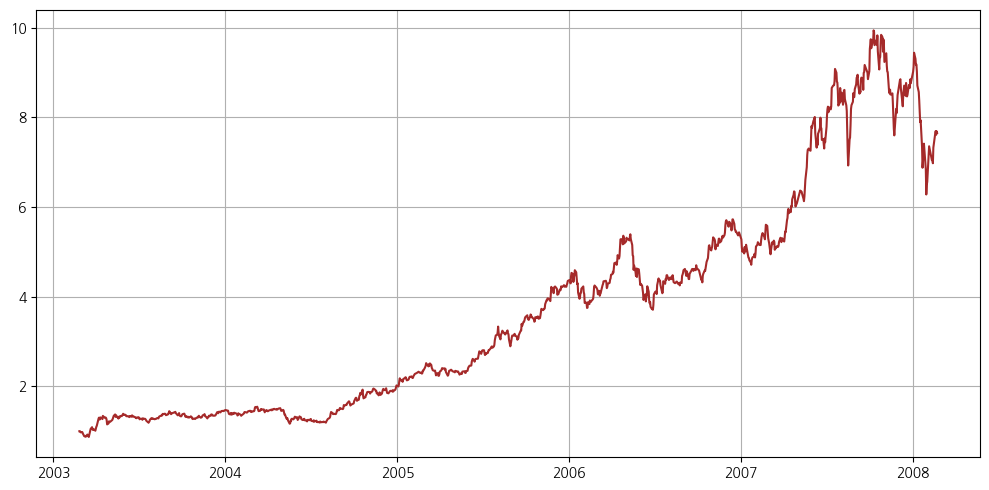

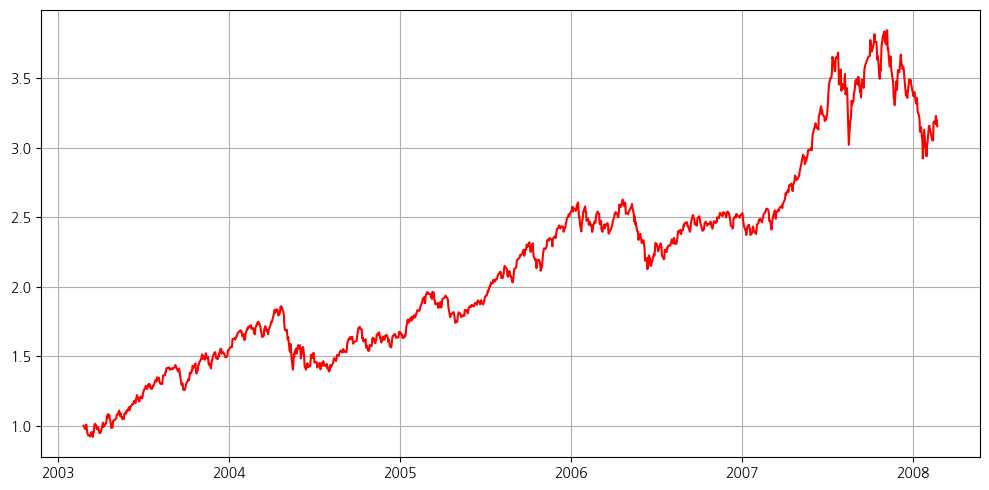

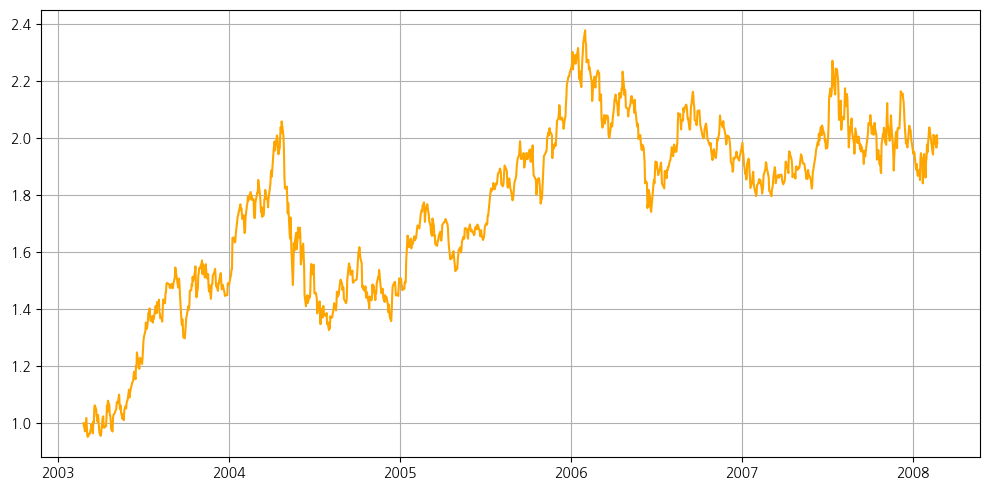

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 설정
# 데이터 불러오기 및 전처리 함수
def load_and_prepare(csv_paths, header=None):
    dfs = []
    for path in csv_paths:
        dfs.append(pd.read_csv(path, encoding='euc-kr'))
    df = pd.concat(dfs, ignore_index=True)
    # MultiIndex 헤더가 있으면 평탄화
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [' '.join(col).strip() for col in df.columns]
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    return df.sort_values(by='일자')
# 섹터별 데이터 경로 정의
datasets = {
    'KOSPI': [
        "/home/psh/dev_ws/eda-repo-4/data/kospi_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/kospi_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/kospi_070226_080222.csv"
    ],
    '에너지': [
        "/home/psh/dev_ws/eda-repo-4/data/ener_080102_080222.csv"
    ],
    '금융': [
        "/home/psh/dev_ws/eda-repo-4/data/bank_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/bank_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/bank_070226_080222.csv"
    ],
    '건설': [
        "/home/psh/dev_ws/eda-repo-4/data/const_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/const_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/const_070226_080222.csv"
    ],
    '제조': [
        "/home/psh/dev_ws/eda-repo-4/data/jejo_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/jejo_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/jejo_070226_080222.csv"
    ],
    '전기전자': [
        "/home/psh/dev_ws/eda-repo-4/data/elec_030225_050224.csv",
        "/home/psh/dev_ws/eda-repo-4/data/elec_050225_070223.csv",
        "/home/psh/dev_ws/eda-repo-4/data/elec_070226_080222.csv"
    ]
}
# 색상 순서: 빨주노초파남
colors = ['blue', 'green', 'purple', 'brown', 'red', 'orange']
# 섹터별 개별 그래프 생성 (정규화 + 60/120일 이동평균)
for i, (sector_name, paths) in enumerate(datasets.items()):
    # 1) 데이터 로드
    df = load_and_prepare(paths, header=0)
    # 2) 가격 컬럼 자동 탐색
    # if sector_name == '휘발유':
    #     oil_cols = [c for c in df.columns if '협' in c]
    #     price_col = oil_cols[0] if oil_cols else df.columns[1]
    #     # 3) 휘발유에서 500 미만인 날 제거
    #     df = df[df[price_col] >= 500]
    # else:
    price_col = '종가'
    # 4) 정규화 및 이동평균 계산
    df['정규화'] = df[price_col] / df[price_col].iloc[0]
    # df['MA60']   = df['정규화'].rolling(window=60,  min_periods=1).mean()
    # df['MA120']  = df['정규화'].rolling(window=120, min_periods=1).mean()
    # 5) 차트 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(df['일자'], df['정규화'], color=colors[i], linestyle='-',  label='정규화')
    # plt.plot(df['일자'], df['MA60'],   color=colors[i], linestyle='--', label='60일 이동평균')
    # plt.plot(df['일자'], df['MA120'],  color=colors[i], linestyle=':',  label='120일 이동평균')
    # plt.title(f'{sector_name} 산업군 가격 추이 (정규화 + 60/120일 이평)', fontsize=14)
    # plt.xlabel('일자')
    # plt.ylabel('정규화 가격 (첫날 대비)')
    plt.grid(True)
    # plt.legend()
    # 6) 임기 수익률 계산 및 텍스트로 표시
    # rate = df['정규화'].iloc[-1] / df['정규화'].iloc[0] - 1
    # rate_percent = f"{rate * 100:.2f}%"
    # label = f"임기 수익률: {rate_percent}"
    # plt.text(
    #     df['일자'].iloc[-1],                 # x: 마지막 날짜
    #     df['정규화'].min(),                 # y: 최소값 기준
    #     label,
    #     fontsize=10,
    #     ha='right',
    #     va='bottom',
    #     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
    # )
    plt.tight_layout()
    plt.show()